In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

In [4]:
data = pd.read_csv('combined_data.dat', sep="\s+", header=None)
data.columns =["compactness","circularity","distance_circularity","radius_ratio","pr_ratio",
                      "max_ratio","scatter_ratio","elongatedness","pr_rectangularity",
                       "max_rectangularity","scaled_major","scaled_minor",
                      "scaled_radius","skewness_major","skewness_minor",
                      "kurtosis_minor","kurtosis_major","hollows_ratio","type"]
data = pd.DataFrame(data)
x = data.drop(columns = 'type') # feature values
y = data['type']                # target values
len(x) # 814 sets of data
len(y)

846

In [5]:
features = x.columns.tolist()       # get all the attribute names and store them in a list
uniquetypes = np.unique(y).tolist() # there are different types of the vehicle, store them in a list
uniquetypes # there are four classes of the target variable (vehicle type)
features    # 18 attributes

['compactness',
 'circularity',
 'distance_circularity',
 'radius_ratio',
 'pr_ratio',
 'max_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr_rectangularity',
 'max_rectangularity',
 'scaled_major',
 'scaled_minor',
 'scaled_radius',
 'skewness_major',
 'skewness_minor',
 'kurtosis_minor',
 'kurtosis_major',
 'hollows_ratio']

In [6]:
# spliting the training and testing datasets:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.35)
x_train  # 284 sets 
x_test   # 530 sets 
y_train  # 284 sets 
y_test   # 530 sets

476    opel
643     bus
805     bus
565    saab
80      bus
       ... 
255    saab
279     bus
343    opel
168     bus
649    saab
Name: type, Length: 550, dtype: object

In [7]:
# Create Decision Tree classifer object
clf_default = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_default = clf_default.fit(x_train,y_train)
y_pred_default=clf_default.predict(x_test)

# Prediction Accuracy:
print("Accuracy:", clf_default.score(x_test, y_test))


Accuracy: 0.6763636363636364


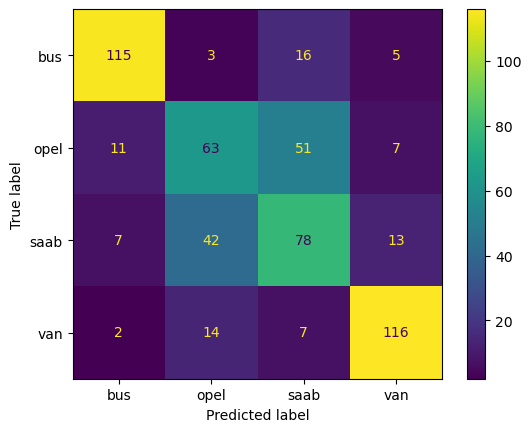

<Figure size 640x480 with 0 Axes>

              precision    recall  f1-score   support

         bus       0.85      0.83      0.84       139
        opel       0.52      0.48      0.50       132
        saab       0.51      0.56      0.53       140
         van       0.82      0.83      0.83       139

    accuracy                           0.68       550
   macro avg       0.68      0.67      0.67       550
weighted avg       0.68      0.68      0.68       550



In [8]:
# Visualise the model prediction error:
cm = confusion_matrix(y_test, y_pred_default, labels=clf_default.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_default.classes_)
disp.plot()
plt.figure()
plt.show()
print(classification_report(y_test, y_pred_default))

In [9]:
# Tune the 'criterion' parameter:
DT = DecisionTreeClassifier(criterion = 'gini')
score = cross_val_score(DT,x_train,y_train,cv=10).mean()
print('Gini Score: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy')
score = cross_val_score(DT,x_train,y_train,cv=10).mean()
print('Entropy Score: %.4f'%score)
# The Entropy score is slightly higher than the Gini Score. 
# So for the later tuning process, i will keep using the 'entropy' as the criterion.


Gini Score: 0.6854
Entropy Score: 0.6966


The best max_depth:  8
The score of the best max_depth:  0.7063218390804598


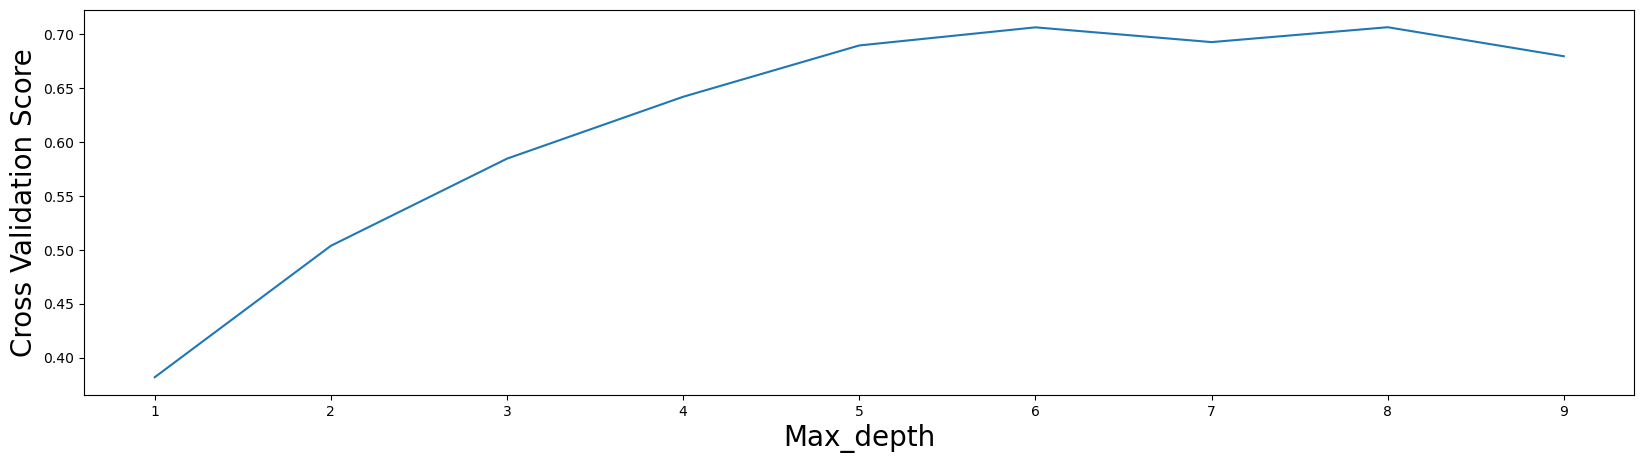

In [10]:
# Tuning the 'max_depth' with best the 'criterion':
ScoreAll = []
for i in range(1,10,1):
    DT = DecisionTreeClassifier(max_depth = i, criterion = 'entropy')
    score = cross_val_score(DT,x_train, y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] # find the indexes of the parameter with highest score
assumed_best_max_depth = int(ScoreAll[max_score][0])
print("The best max_depth: ", assumed_best_max_depth)
print("The score of the best max_depth: ",ScoreAll[max_score][1])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1], )
plt.xlabel("Max_depth", fontsize = 20)
plt.ylabel("Cross Validation Score", fontsize = 20)
plt.show()

The best min_samples_split:  5
The score of the best min_samples_split:  0.7094252873563218


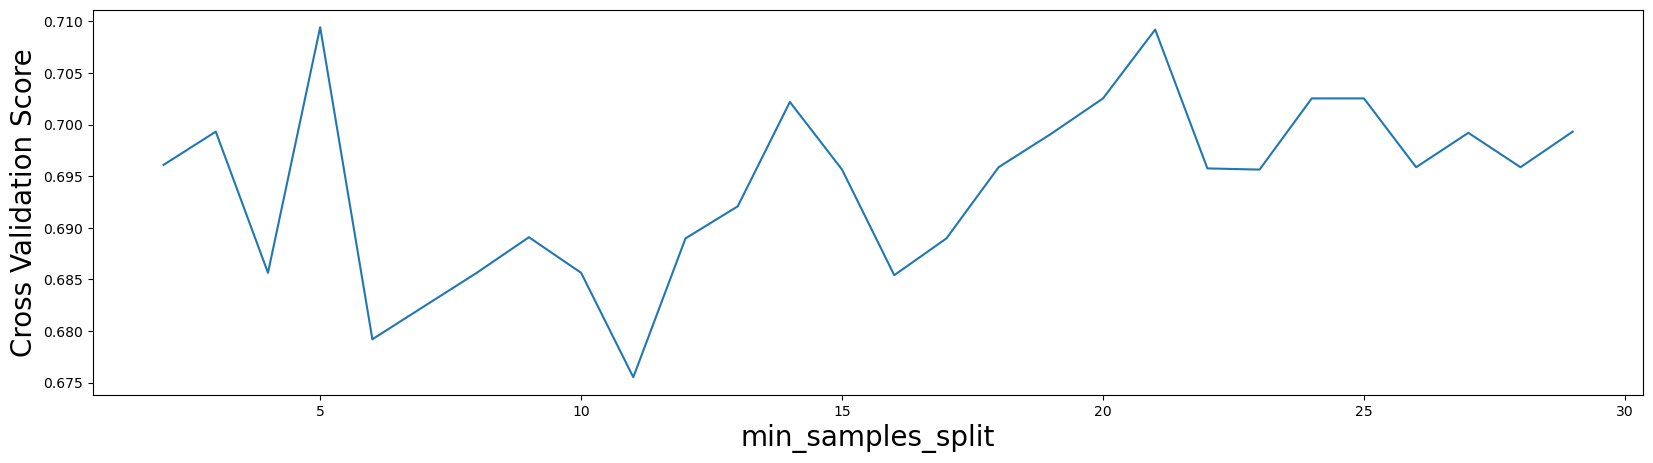

In [11]:
# Tuning the 'min_samples_split' with the best 'criterion' and 'max_depth':
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(max_depth = assumed_best_max_depth, min_samples_split = i, criterion = 'entropy')
    score = cross_val_score(DT,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
assumed_best_min_samples_split = int(ScoreAll[max_score][0])
print("The best min_samples_split: ", assumed_best_min_samples_split)
print("The score of the best min_samples_split: ",ScoreAll[max_score][1])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.xlabel("min_samples_split", fontsize = 20)
plt.ylabel("Cross Validation Score", fontsize = 20)
plt.show()

The best min_samples_leaf:  1
The score of the best min_samples_leaf:  0.7059770114942528


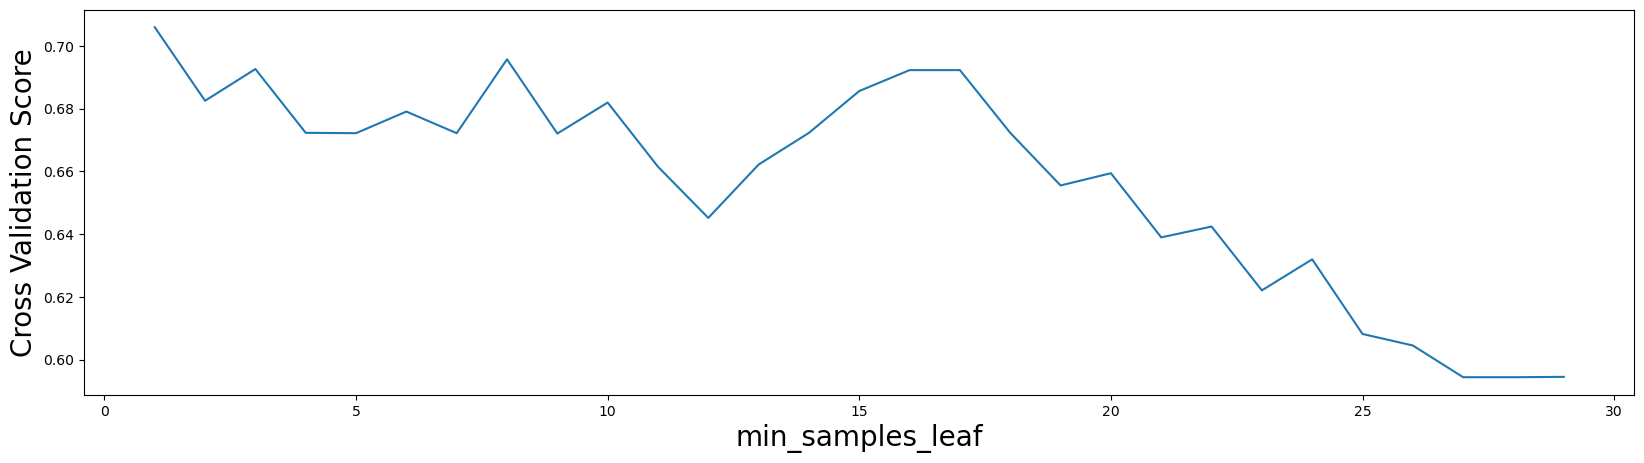

In [12]:
# Tuning the 'min_samples_leaf' with the best 'criterion', 'max_depth' and 'min_samples_split':
ScoreAll = []
for i in range(1, 30):
    DT = DecisionTreeClassifier(min_samples_leaf = i, max_depth = assumed_best_max_depth, criterion = 'entropy', min_samples_split = assumed_best_min_samples_split)
    score = cross_val_score(DT,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)
max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] 
print("The best min_samples_leaf: ", int(ScoreAll[max_score][0]))
print("The score of the best min_samples_leaf: ",ScoreAll[max_score][1])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.xlabel("min_samples_leaf", fontsize = 20)
plt.ylabel("Cross Validation Score", fontsize = 20)
plt.show()

In [13]:
# Tuning the 'max_depth', 'min_samples_leaf' and 'min_samples_split' together!
param_grid = {
    'max_depth':np.arange(5, 9),
    'min_samples_leaf':np.arange(1, 6),
    'min_samples_split':np.arange(5, 18)
}

rfc = DecisionTreeClassifier(criterion = 'entropy')
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(x,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6}
0.7340336134453782


In [14]:
# Using the new hyperparameter which are tuned:
new_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8, min_samples_leaf = 3, min_samples_split = 6)

# Train Decision Tree Classifer
new_clf = new_clf.fit(x_train,y_train)

# Prediction Accuracy:""
print("Accuracy:", new_clf.score(x_test, y_test))

Accuracy: 0.6781818181818182


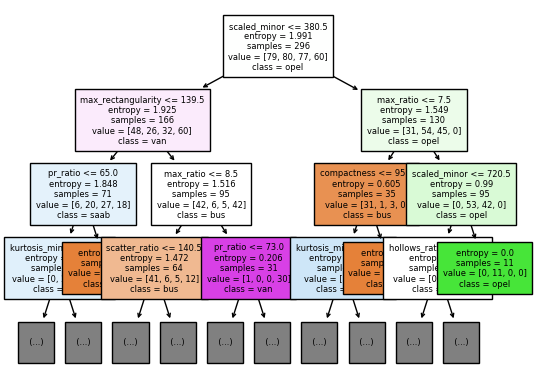

In [15]:
# Plot the new decision tree with the class names: (due to size, max_depth = 3 is added to limit the display!)
plot_tree(new_clf, feature_names = x_train.columns, max_depth = 3, filled = True, class_names= uniquetypes, fontsize = 6)
plt.savefig("decision_tree.png") # save into png.file. 


In [16]:
# Get the accuracy report for the new tuned model:
print(classification_report(y_test, new_clf.predict(x_test)))

              precision    recall  f1-score   support

         bus       0.82      0.90      0.86       139
        opel       0.51      0.48      0.49       132
        saab       0.50      0.55      0.53       140
         van       0.89      0.78      0.83       139

    accuracy                           0.68       550
   macro avg       0.68      0.68      0.68       550
weighted avg       0.68      0.68      0.68       550



In [17]:
# Display the score of previous model (build with default hyperparameters) and its prediction accuracy:
print(clf_default.score(x_train, y_train))  # Seriously Overfitting!!!!
print(clf_default.score(x_test, y_test))

1.0
0.6763636363636364


In [18]:
# Display the score of new model (build with mannual adjusted hyperparameters) and its prediction accuracy:
print(new_clf.score(x_train, y_train))  # Less overfitting 
print(new_clf.score(x_test, y_test))

0.9054054054054054
0.6781818181818182
